# Data Exploration


In [86]:
import pandas as pd
import numpy as np

# Chicago Crime Dataset Analysis

## Dataset Overview

This notebook explores the Chicago Crime Dataset, which contains reported incidents of crime in the city of Chicago. The data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

## Data Dictionary

The dataset contains 22 columns with the following information:

| Column Name              | Description                                                                               | Data Type          |
| ------------------------ | ----------------------------------------------------------------------------------------- | ------------------ |
| **ID**                   | Unique identifier for the record                                                          | Number             |
| **Case Number**          | The Chicago Police Department RD Number (Records Division Number), unique to the incident | Text               |
| **Date**                 | Date when the incident occurred (sometimes an estimate)                                   | Floating Timestamp |
| **Block**                | Partially redacted address where the incident occurred                                    | Text               |
| **IUCR**                 | Illinois Uniform Crime Reporting code linked to Primary Type and Description              | Text               |
| **Primary Type**         | Primary description of the IUCR code                                                      | Text               |
| **Description**          | Secondary description of the IUCR code (subcategory)                                      | Text               |
| **Location Description** | Description of the location where the incident occurred                                   | Text               |
| **Arrest**               | Indicates whether an arrest was made                                                      | Checkbox           |
| **Domestic**             | Indicates whether the incident was domestic-related                                       | Checkbox           |
| **Beat**                 | The police beat where the incident occurred                                               | Text               |
| **District**             | The police district where the incident occurred                                           | Text               |
| **Ward**                 | The ward (City Council district) where the incident occurred                              | Number             |
| **Community Area**       | The community area where the incident occurred (Chicago has 77 areas)                     | Text               |
| **FBI Code**             | Crime classification based on FBI's National Incident-Based Reporting System              | Text               |
| **X Coordinate**         | X coordinate in State Plane Illinois East NAD 1983 projection                             | Number             |
| **Y Coordinate**         | Y coordinate in State Plane Illinois East NAD 1983 projection                             | Number             |
| **Year**                 | Year the incident occurred                                                                | Number             |
| **Updated On**           | Date and time the record was last updated                                                 | Floating Timestamp |
| **Latitude**             | Latitude of the incident location (partially redacted)                                    | Number             |
| **Longitude**            | Longitude of the incident location (partially redacted)                                   | Number             |
| **Location**             | Location formatted for geographic operations                                              | Location           |

## Important Notes:

- Location data (coordinates, latitude/longitude) is shifted from the actual location for privacy but remains on the same block
- A **Beat** is the smallest police geographic area with a dedicated police car
- Three to five beats make up a police sector
- Three sectors make up a police district
- Chicago has 22 police districts and 77 community areas
- The IUCR (Illinois Uniform Crime Reporting) codes provide standardized categories for crime types

## Analysis Goals

In this notebook, we'll explore:

1. Crime patterns across different areas of Chicago
2. Temporal trends in crime rates
3. Relationships between crime types and locations
4. Predictive modeling to identify factors associated with different crime outcomes


In [87]:
data_path = "data/"
df_train = pd.read_csv(f"{data_path}processed_train_data.csv")
df_test = pd.read_csv(f"{data_path}processed_test_data.csv")
df_train.drop(
    ["Date", "Location", "X Coordinate", "Y Coordinate"], axis=1, inplace=True
)
df_test.drop(["Date", "Location", "X Coordinate", "Y Coordinate"], axis=1, inplace=True)

In [88]:
df_train.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Month,Day,Hour,WeekDay,IsWeekday,Location Group,lat_bin,lon_bin,TimeCategory,Season
0,13163389,JG368090,034XX W MELROSE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1732,...,8,3,12,3,True,STREET_OUTDOOR,"(41.939, 41.947]","(-87.716, -87.707]",Morning,Summer
1,12485621,JE377297,036XX N CENTRAL AVE,0560,ASSAULT,SIMPLE,Other,False,False,1633,...,9,17,14,4,True,OFFICE_BUSINESS,"(41.947, 41.955]","(-87.774, -87.765]",Afternoon,Summer
2,12466477,JE354006,030XX W 60TH ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,823,...,8,25,16,2,True,RESIDENTIAL,"(41.781, 41.788]","(-87.707, -87.699]",Afternoon,Summer
3,12906925,JF491648,014XX S STATE ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,131,...,5,15,9,6,False,RESIDENTIAL,"(41.856, 41.864]","(-87.632, -87.624]",Morning,Spring
4,12438167,JE319518,004XX S MORGAN ST,0620,BURGLARY,UNLAWFUL ENTRY,Other,False,False,1232,...,7,30,8,4,True,OFFICE_BUSINESS,"(41.871, 41.879]","(-87.657, -87.649]",Morning,Summer


In [89]:
df_train.describe()

,ID,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Month,Day,Hour,WeekDay
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.00000,200000.000000
mean,1.276376e+07,1153.065150,11.301515,23.168160,36.563325,2022.082460,41.844802,-87.668837,6.72284,15.689560,12.47187,3.022995
std,7.902234e+05,707.618674,7.072775,14.042908,21.567460,0.810305,0.087535,0.059693,3.35780,8.851052,6.92821,1.996944
min,2.570500e+04,111.000000,1.000000,1.000000,1.000000,2021.000000,41.644590,-87.939733,1.00000,1.000000,0.00000,0.000000
25%,1.253600e+07,533.000000,5.000000,9.000000,22.000000,2021.000000,41.768480,-87.710746,4.00000,8.000000,8.00000,1.000000
50%,1.280971e+07,1031.000000,10.000000,24.000000,32.000000,2022.000000,41.861711,-87.662229,7.00000,16.000000,13.00000,3.000000
75%,1.307124e+07,1731.000000,17.000000,34.000000,53.000000,2023.000000,41.908918,-87.626649,10.00000,23.000000,18.00000,5.000000
max,1.369768e+07,2535.000000,31.000000,50.000000,77.000000,2023.000000,42.022548,-87.524532,12.00000,31.000000,23.00000,6.000000


In [90]:
nunique_df = pd.DataFrame(
    {
        "Column": df_train.columns,
        "Unique Values": df_train.nunique().values,
        "Type": df_train.dtypes.values,
        "Is Null": df_train.isnull().sum().values,
    }
)
nunique_df.sort_values("Unique Values", ascending=False)

,Column,Unique Values,Type,Is Null
0,ID,200000,int64,0
1,Case Number,199988,object,0
16,Latitude,109993,float64,0
17,Longitude,109992,float64,0
2,Block,27252,object,0
15,Updated On,1785,object,0
3,IUCR,307,object,0
5,Description,285,object,0
9,Beat,275,int64,0
12,Community Area,77,float64,0


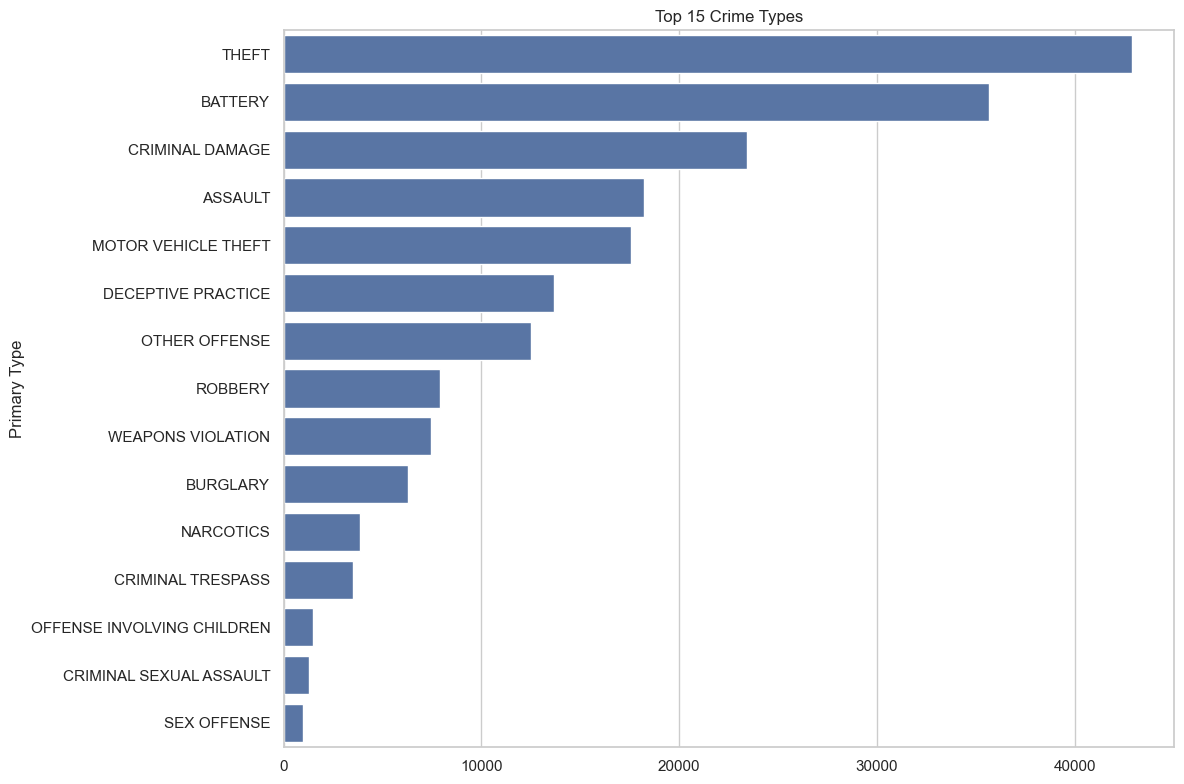

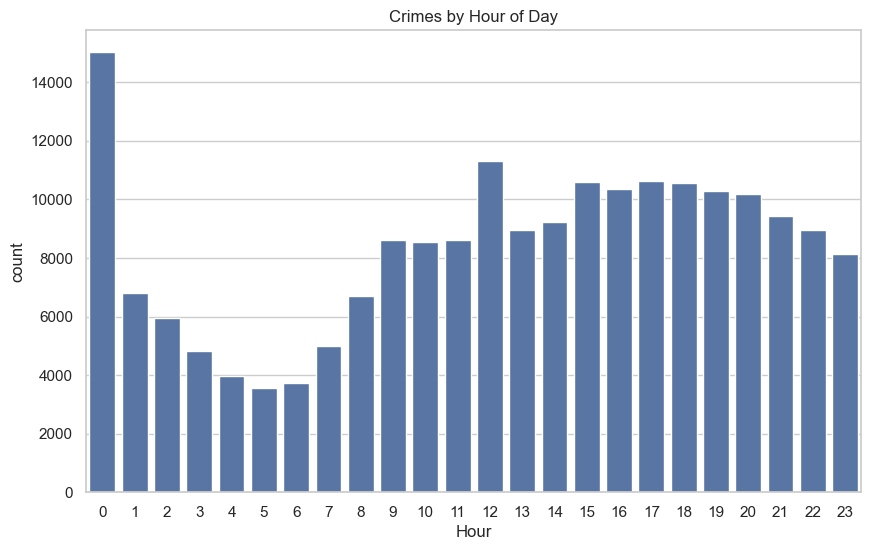

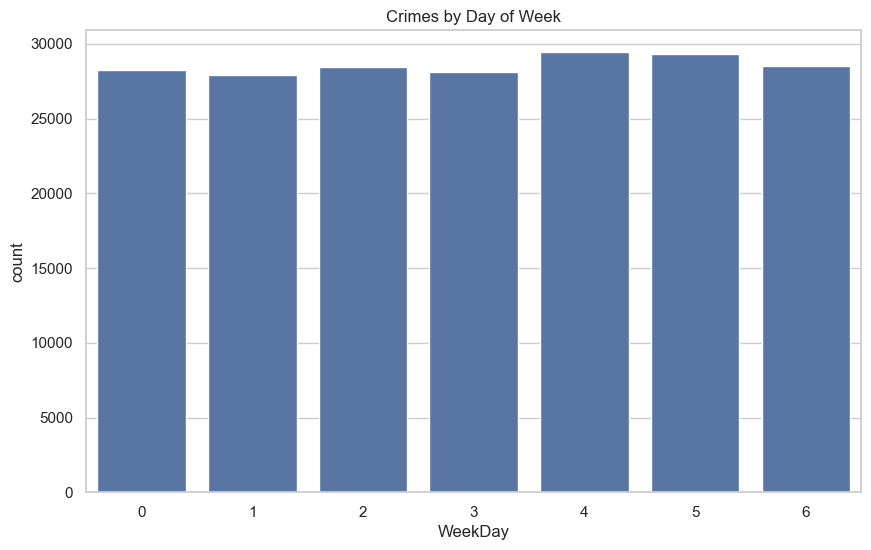

In [91]:
# Visualize crime distribution by type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
crime_counts = df_train["Primary Type"].value_counts().head(15)
sns.barplot(x=crime_counts.values, y=crime_counts.index)
plt.title("Top 15 Crime Types")
plt.tight_layout()
plt.show()

# Time-based patterns
plt.figure(figsize=(10, 6))
sns.countplot(x="Hour", data=df_train)
plt.title("Crimes by Hour of Day")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x="WeekDay", data=df_train)
plt.title("Crimes by Day of Week")
plt.show()

## Arrest Rates by Crime Type


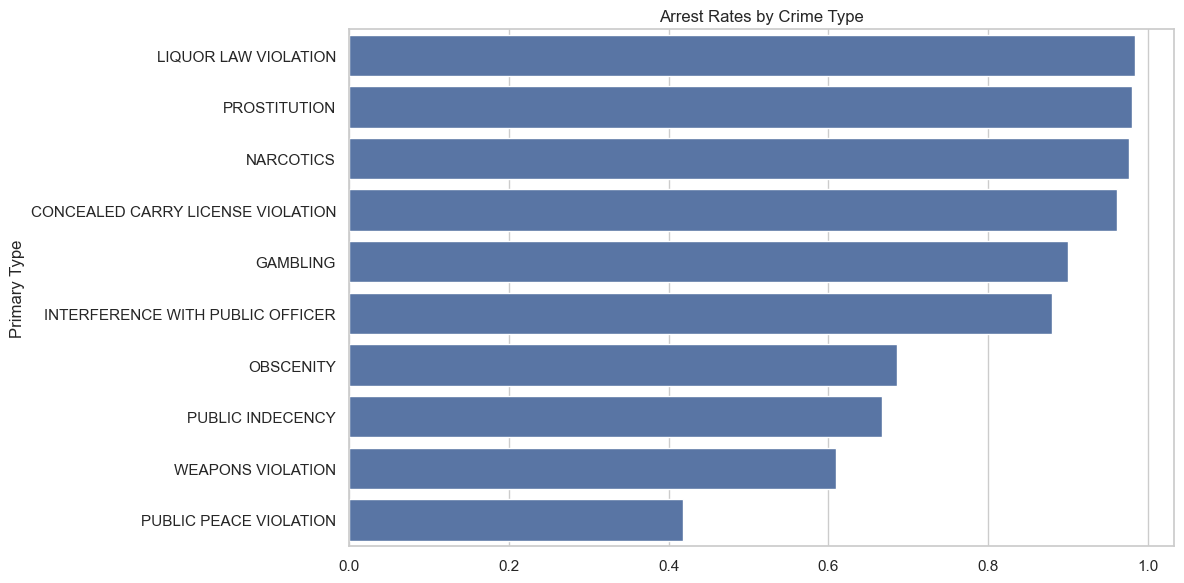

In [92]:
plt.figure(figsize=(12, 6))
arrest_rates = (
    df_train.groupby("Primary Type")["Arrest"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
sns.barplot(x=arrest_rates.values, y=arrest_rates.index)
plt.title("Arrest Rates by Crime Type")
plt.tight_layout()
plt.show()

# Arrest Rates by Location


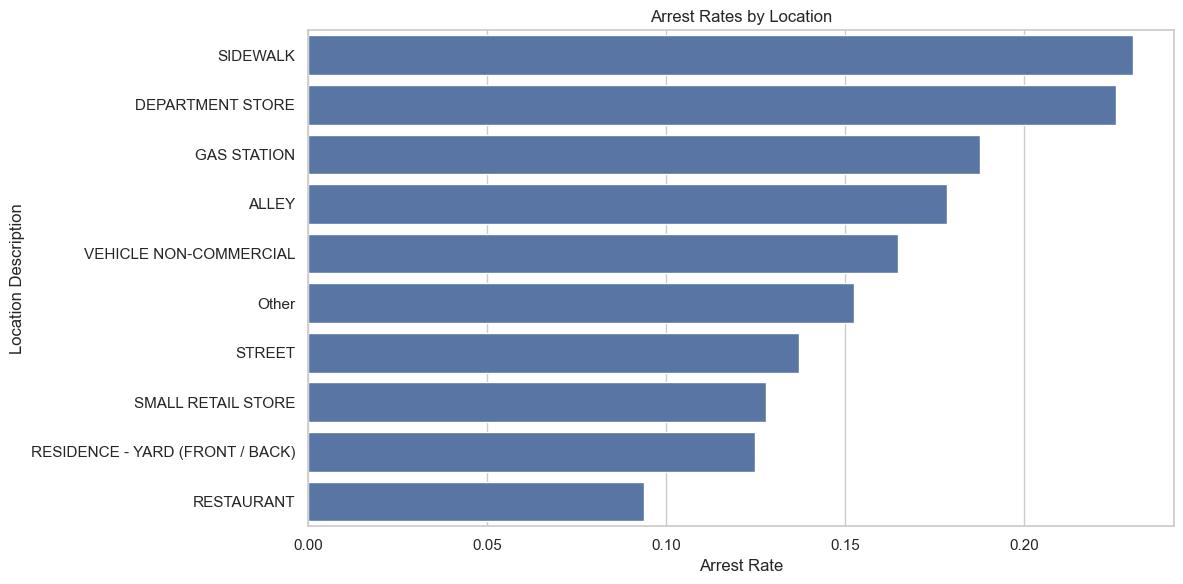

In [93]:
plt.figure(figsize=(12, 6))
location_arrest = (
    df_train.groupby("Location Description")["Arrest"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
sns.barplot(x=location_arrest.values, y=location_arrest.index)
plt.title("Arrest Rates by Location")
plt.xlabel("Arrest Rate")
plt.tight_layout()
plt.show()

## Arrest Rates by District


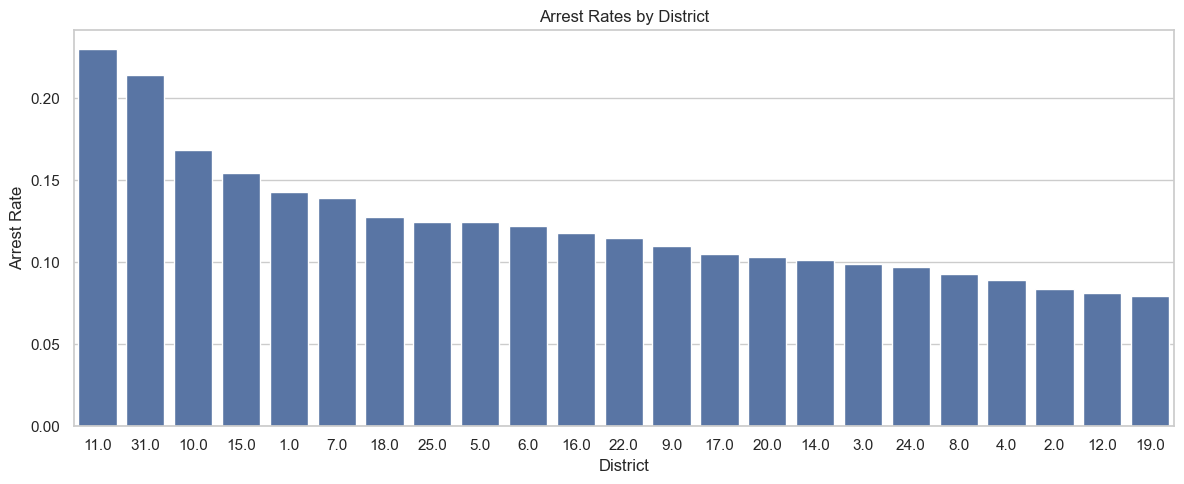

In [94]:
plt.figure(figsize=(12, 5))
district_arrest = (
    df_train.groupby("District")["Arrest"].mean().sort_values(ascending=False)
)
sns.barplot(x=district_arrest.index.astype(str), y=district_arrest.values)
plt.title("Arrest Rates by District")
plt.xlabel("District")
plt.ylabel("Arrest Rate")
plt.tight_layout()
plt.show()

## Crime Type by Top Location Groups


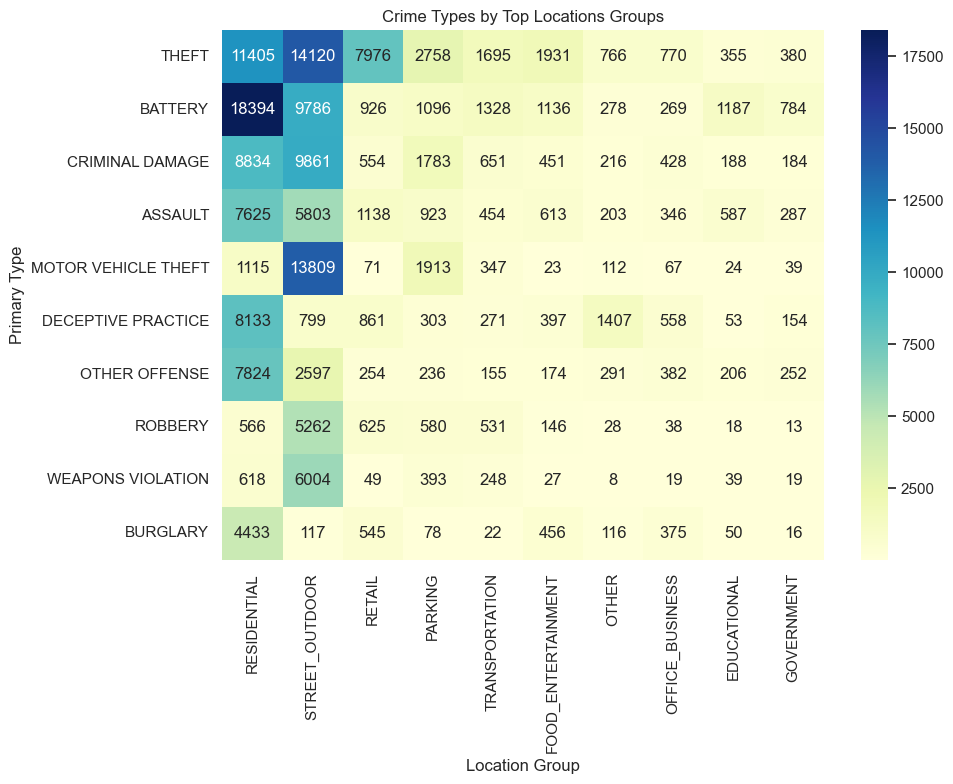

In [95]:
plt.figure(figsize=(10, 8))
top_crimes = df_train["Primary Type"].value_counts().head(10).index
top_locations = df_train["Location Group"].value_counts().head(10).index
crime_by_location = pd.crosstab(df_train["Primary Type"], df_train["Location Group"])[
    top_locations
].loc[top_crimes]
sns.heatmap(crime_by_location, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Crime Types by Top Locations Groups")
plt.tight_layout()
plt.show()

## Crime Counts By Season


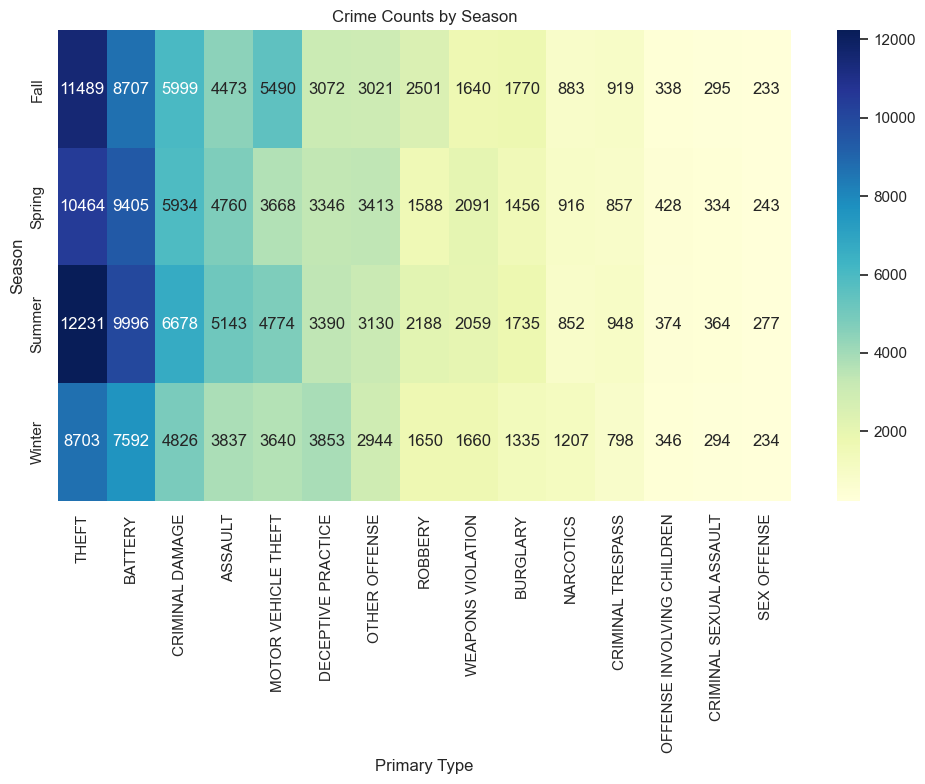

In [96]:
plt.figure(figsize=(10, 8))
season_crime = pd.crosstab(df_train["Season"], df_train["Primary Type"])
top_crimes = df_train["Primary Type"].value_counts().head(15).index
season_crime = season_crime[top_crimes]
sns.heatmap(season_crime, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Crime Counts by Season")
plt.tight_layout()
plt.show()

## Correlation Matrix


In [97]:
plt.figure(figsize=(12, 10))
numerical_cols = df_train.select_dtypes(include=["number"]).columns.drop(
    ["Year", "ID", "IsWeekday"]
)
corr_matrix = df_train[numerical_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, mask=mask, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f"
)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

KeyError: "['IsWeekday'] not found in axis"

<Figure size 1200x1000 with 0 Axes>